# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

<a class="anchor" id="0.1"></a>
# Table Of Content

[1. Import Libraries, Load Dataset, Exploring Data](#1)<br>

[2. Exploratory Data Analysis (EDA)](#5)<br>
[3. Cluster Analysis](#6)<br>
>[3.1 K-Means Clustering](#7)<br>
>[3.2 Hierarchical Clustering](#13)<br>

[4. Conclusion](#17)<br>
>[4.1 Interpretation based on Age and Spending Score- x1](#18)<br>
>[4.2 Interpretation based on Annual Income and Spending Score- x2](#19)
    

---
---

# 1. Import Libraries, Load Dataset, Exploring Data <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membership card they provide following information : gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

## 1.1 Import Libraries <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from pyclustertend import hopkins
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## 1.2 Load Dataset <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

In [2]:
df = pd.read_csv("Mall_Customers.csv")

## 1.3 Explore Data <a class="anchor" id="4"></a>
[Table of Contents](#0.1)

You can rename columns to more usable, if you need.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = df.columns.str.strip("(1-100)").str.strip("(k$ ").str.lower().str.replace(" ", "_")

In [5]:
df.head(1)

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39


---
---

# 2. Exploratory Data Analysis (EDA) <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
for column in df.columns:
    print(f"Column Name : {column}")
    print(df[column].unique())
    print("-----------------------------------------------------------")

Column Name : customerid
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
-----------------------------------------------------------
Column Name : gender
['Male' 'Female']
-----------------------------------------------------------
Col

In [8]:
df.describe()

,customerid,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.drop(columns="customerid", inplace=True)

In [10]:
df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [11]:
df.duplicated().sum()

0

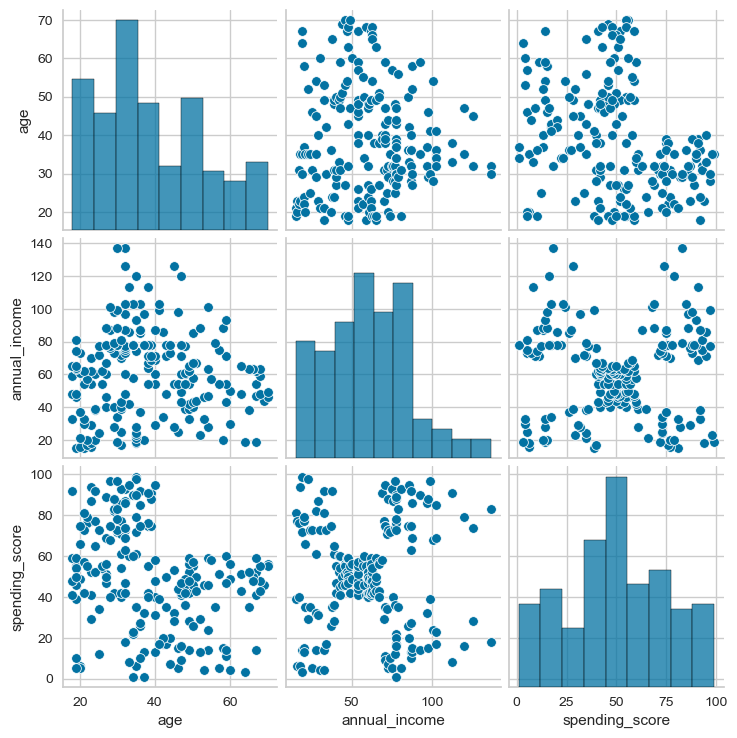

In [12]:
sns.pairplot(df);

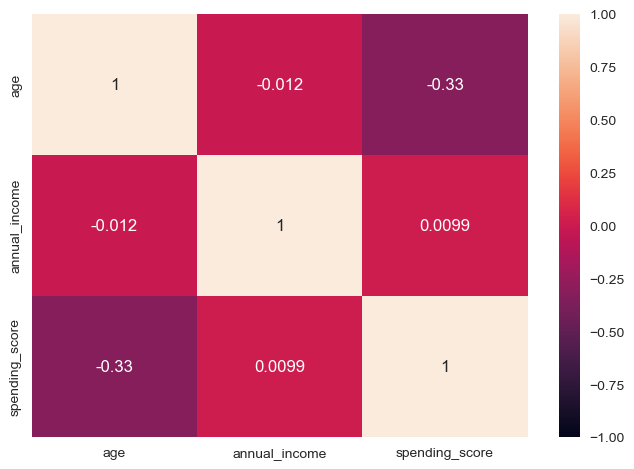

In [13]:
sns.heatmap(df.corr(), annot=True, vmin=-1);

In [14]:
df.columns

Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

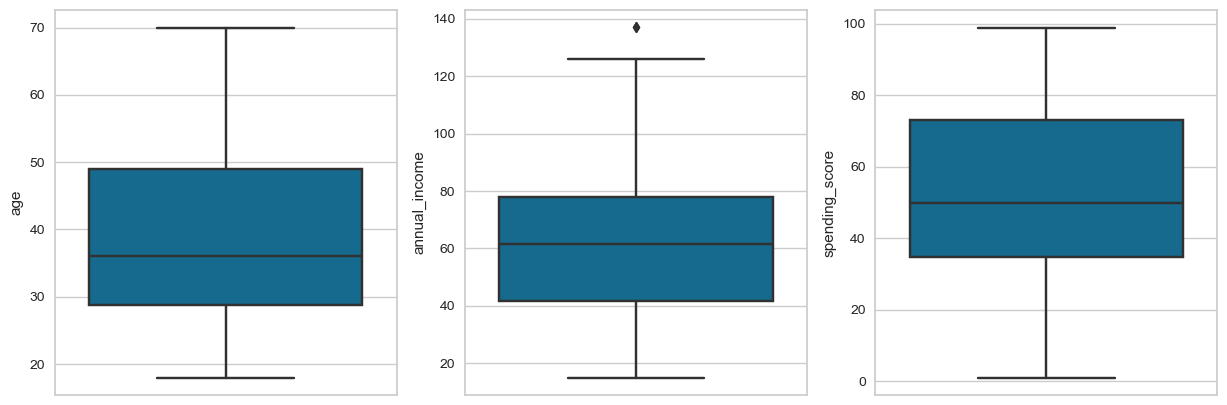

In [15]:
plt.figure(figsize=(15,5))
i = 1
for column in df.drop(columns="gender"):
    plt.subplot(1,3,i)
    sns.boxplot(y = column, data=df)
    i += 1

---
---

# 3. Cluster Analysis <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## 3.1 K-Means Clustering <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

### 3.1.1 Clustering based on Age and Spending Score <a class="anchor" id="8"></a>
[Table of Contents](#0.1)

#### 3.1.1.1 Create a new dataset with two variables of your choice

In [16]:
X = df.loc[:, ["age", "spending_score"]]
X.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### 3.1.1.2 Determine optimal number of clusters

In [17]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

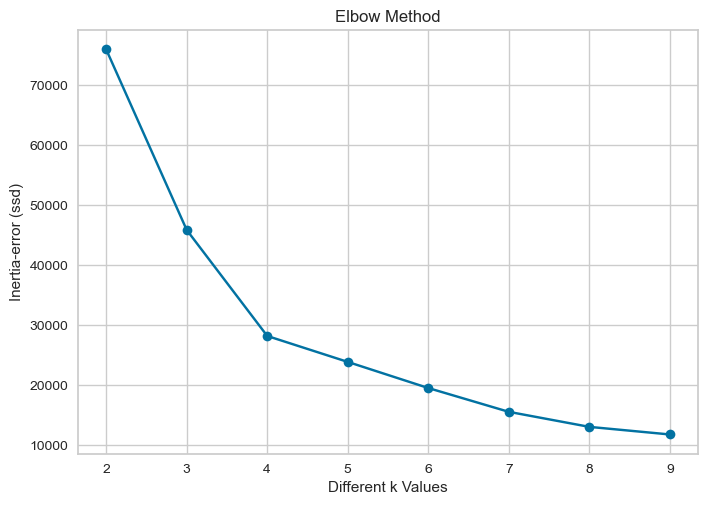

In [18]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k Values")
plt.ylabel("Inertia-error (ssd)")
plt.title("Elbow Method");

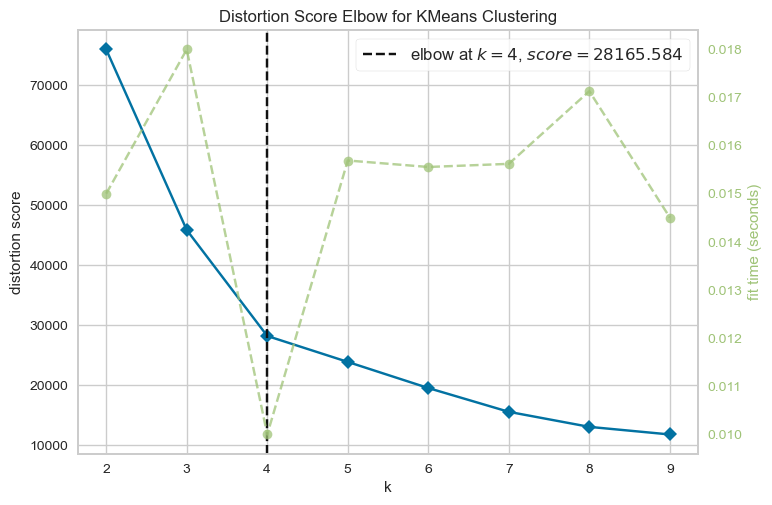

In [19]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k = K)

visualizer.fit(X)
visualizer.show();

In [20]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    model = KMeans(n_clusters=num_clusters, random_state=42)
    model.fit(X)
    cluster_labels = model.labels_
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print(f"Num of Cluster : {num_clusters} and Silhoutte Score : {round(silhoutte_avg, 3)}")

Num of Cluster : 2 and Silhoutte Score : 0.469
Num of Cluster : 3 and Silhoutte Score : 0.453
Num of Cluster : 4 and Silhoutte Score : 0.5
Num of Cluster : 5 and Silhoutte Score : 0.434
Num of Cluster : 6 and Silhoutte Score : 0.438
Num of Cluster : 7 and Silhoutte Score : 0.423
Num of Cluster : 8 and Silhoutte Score : 0.432


#### 3.1.1.3 Apply K Means

In [21]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(X)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### 3.1.1.4 Visualizing and Labeling All the Clusters

In [22]:
clusters = model.labels_

In [23]:
X["predicted_clusters"] = clusters

In [24]:
X.head(3)

,age,spending_score,predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1


In [25]:
X["predicted_clusters"].value_counts()

2    57
1    48
0    48
3    47
Name: predicted_clusters, dtype: int64

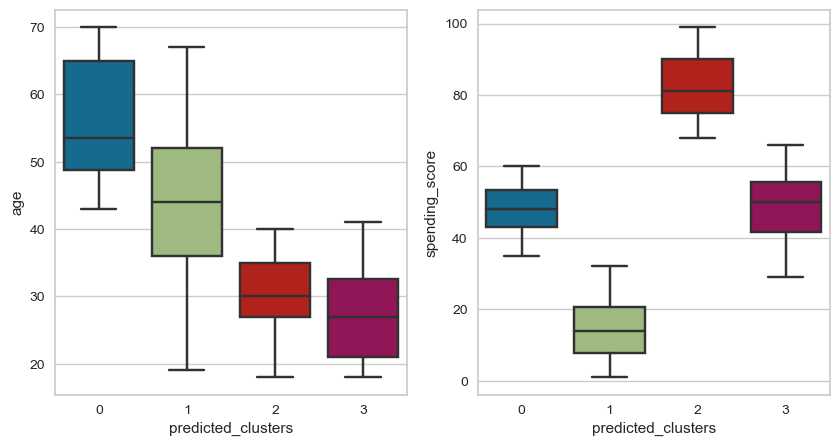

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X, x="predicted_clusters", y = "age")

plt.subplot(1,2,2)
sns.boxplot(data=X, x="predicted_clusters", y = "spending_score");

In [27]:
X = X.iloc[:, [0, 1]].values

In [28]:
X[:10]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72]], dtype=int64)

In [29]:
clusters

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

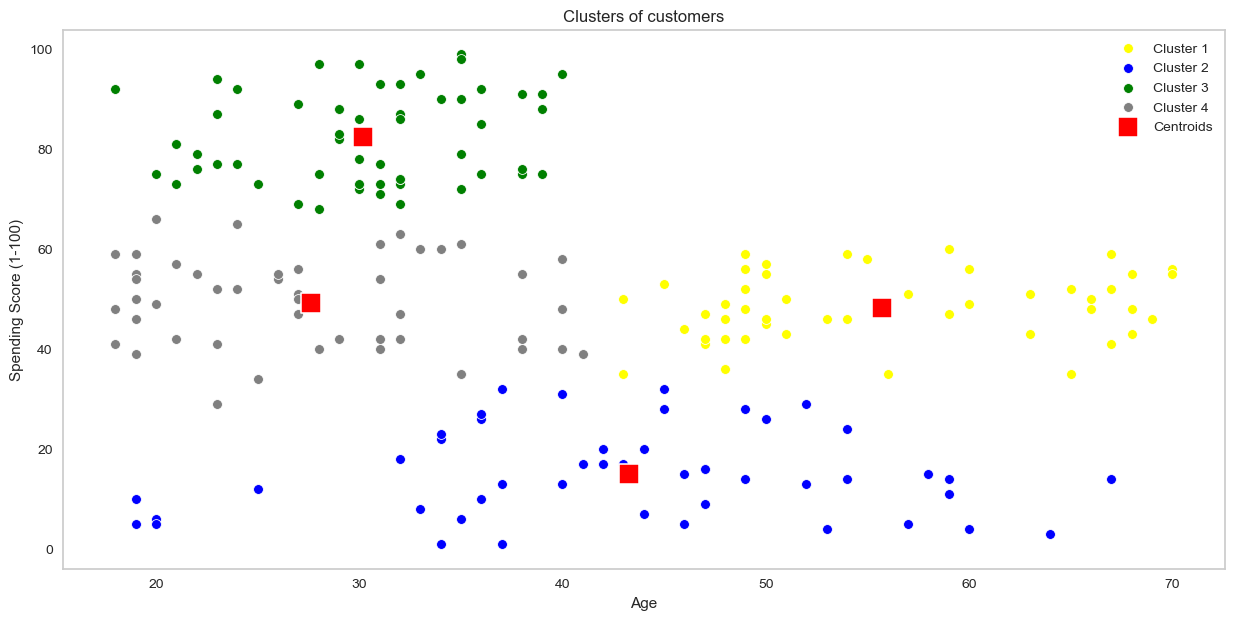

In [30]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[clusters == 0, 0], X[clusters == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[clusters == 1, 0], X[clusters == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[clusters == 2, 0], X[clusters == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[clusters == 3, 0], X[clusters == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=200,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 3.1.2 Clustering based on Annual Income and Spending Score <a class="anchor" id="9"></a>
[Table of Contents](#0.1)

#### 3.1.2.1 Create a new dataset with two variables of your choice

In [31]:
X2 = df.loc[:, ["annual_income", "spending_score"]]
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### 3.1.2.2 Determine optimal number of clusters

In [32]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)

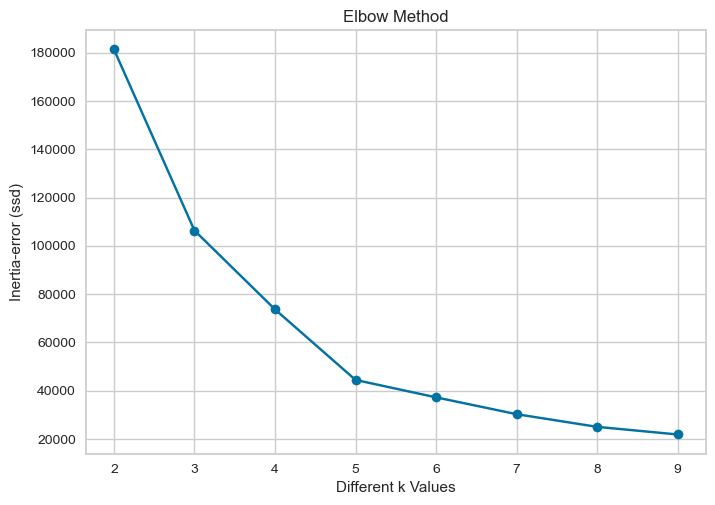

In [33]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k Values")
plt.ylabel("Inertia-error (ssd)")
plt.title("Elbow Method");

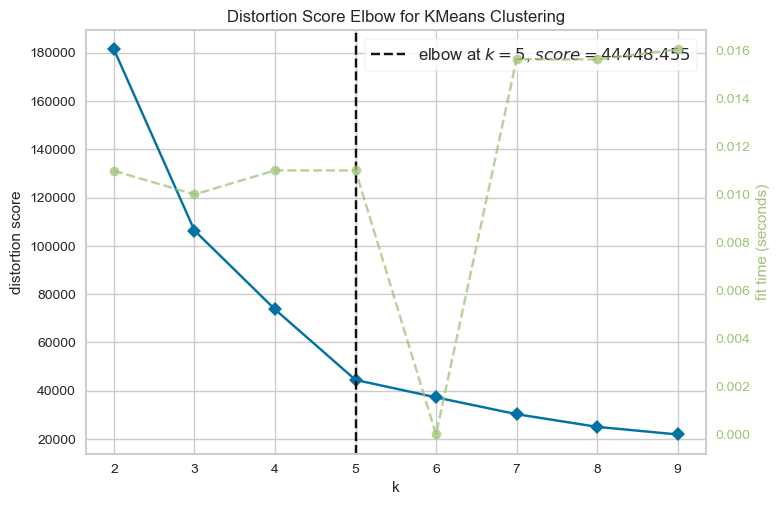

In [34]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k = K)

visualizer.fit(X2)
visualizer.show();

In [35]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    model = KMeans(n_clusters=num_clusters, random_state=42)
    model.fit(X2)
    cluster_labels = model.labels_
    silhoutte_avg = silhouette_score(X2, cluster_labels)
    print(f"Num of Cluster : {num_clusters} and Silhoutte Score : {round(silhoutte_avg, 3)}")

Num of Cluster : 2 and Silhoutte Score : 0.297
Num of Cluster : 3 and Silhoutte Score : 0.468
Num of Cluster : 4 and Silhoutte Score : 0.493
Num of Cluster : 5 and Silhoutte Score : 0.554
Num of Cluster : 6 and Silhoutte Score : 0.54
Num of Cluster : 7 and Silhoutte Score : 0.526
Num of Cluster : 8 and Silhoutte Score : 0.458


#### 3.1.2.3 Apply K Means

In [36]:
model = KMeans(n_clusters=5, random_state=42)
model.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

#### 3.1.2.4 Visualizing and Labeling All the Clusters

In [37]:
clusters = model.labels_
X2["predicted_clusters"]  = clusters

In [38]:
X2.head()

,annual_income,spending_score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [39]:
X2["predicted_clusters"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters, dtype: int64

In [40]:
X2 = X2.iloc[:, [0, 1]].values

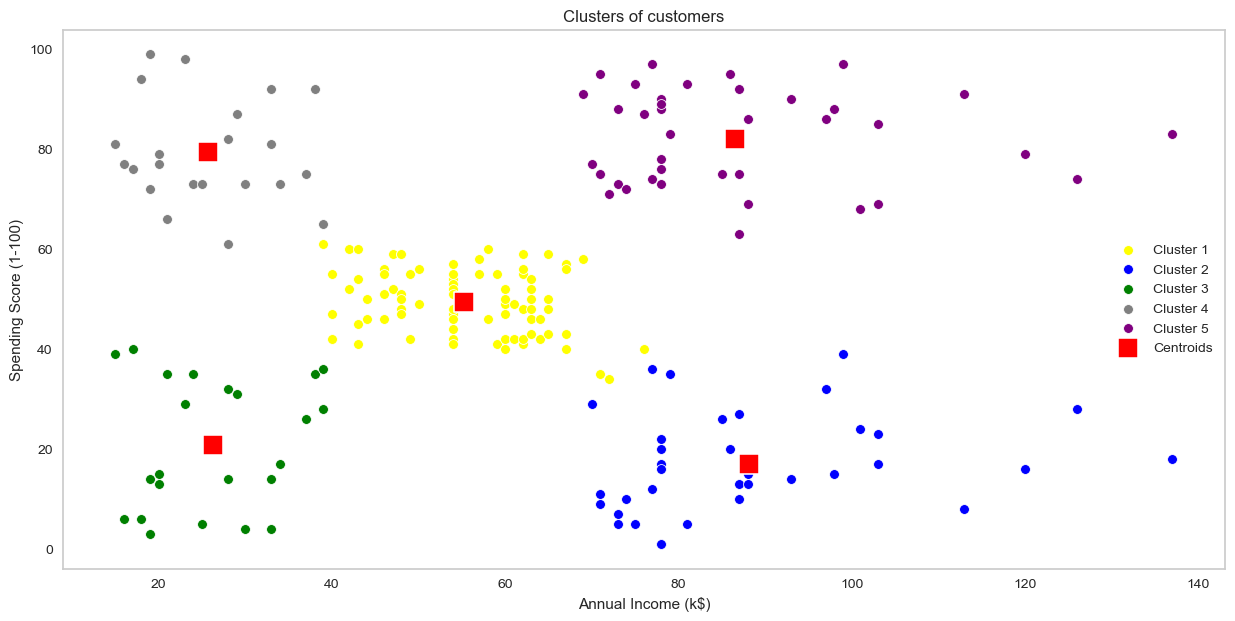

In [41]:
plt.figure(figsize=(15,7))
sns.scatterplot(X2[clusters == 0, 0], X2[clusters == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X2[clusters == 1, 0], X2[clusters == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X2[clusters == 2, 0], X2[clusters == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X2[clusters == 3, 0], X2[clusters == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X2[clusters == 4, 0], X2[clusters == 4, 1], color = 'purple', label = 'Cluster 5',s=50)
sns.scatterplot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=200,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 3.2 Hierarchical Clustering <a class="anchor" id="13"></a>
[Table of Contents](#0.1)

### 3.2.1 Determine optimal number of clusters using Dendogram

### 3.2.1.1 Clustering based on Age and Spending Score- x1

In [42]:
X1 = df.loc[:, ["age", "spending_score"]]
X1.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [43]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete") 
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

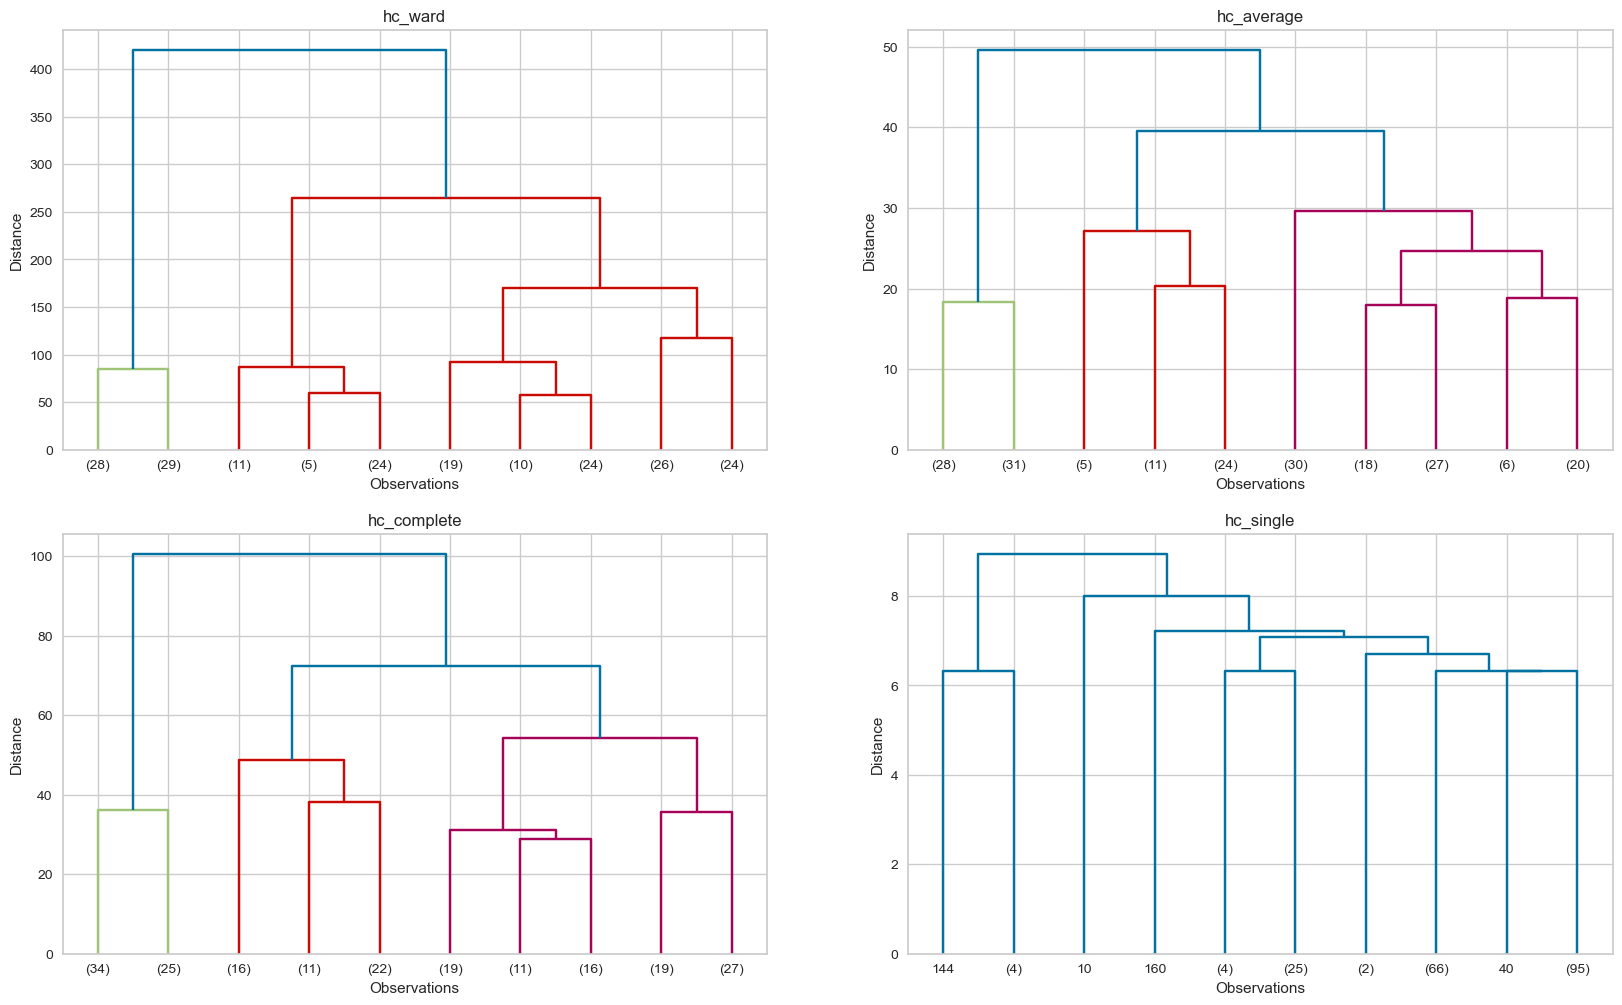

In [44]:
plt.figure(figsize = (20,12))
hc_names = ["hc_ward", "hc_average", "hc_complete", "hc_single"]
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10, truncate_mode='lastp', p=10)
    k +=1

In [45]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X1)
    print(f"Num of Clusters : {k}, Score : {round(silhouette_score(X1, model.labels_), 3)}")

Num of Clusters : 2, Score : 0.455
Num of Clusters : 3, Score : 0.441
Num of Clusters : 4, Score : 0.46
Num of Clusters : 5, Score : 0.404
Num of Clusters : 6, Score : 0.413
Num of Clusters : 7, Score : 0.416
Num of Clusters : 8, Score : 0.388
Num of Clusters : 9, Score : 0.395


### 3.2.1.2 Clustering based on Annual Income and Spending Score- x2
[Table of Contents](#0.1)

In [46]:
X2 = df.loc[:, ["annual_income", "spending_score"]]
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [47]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete") 
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

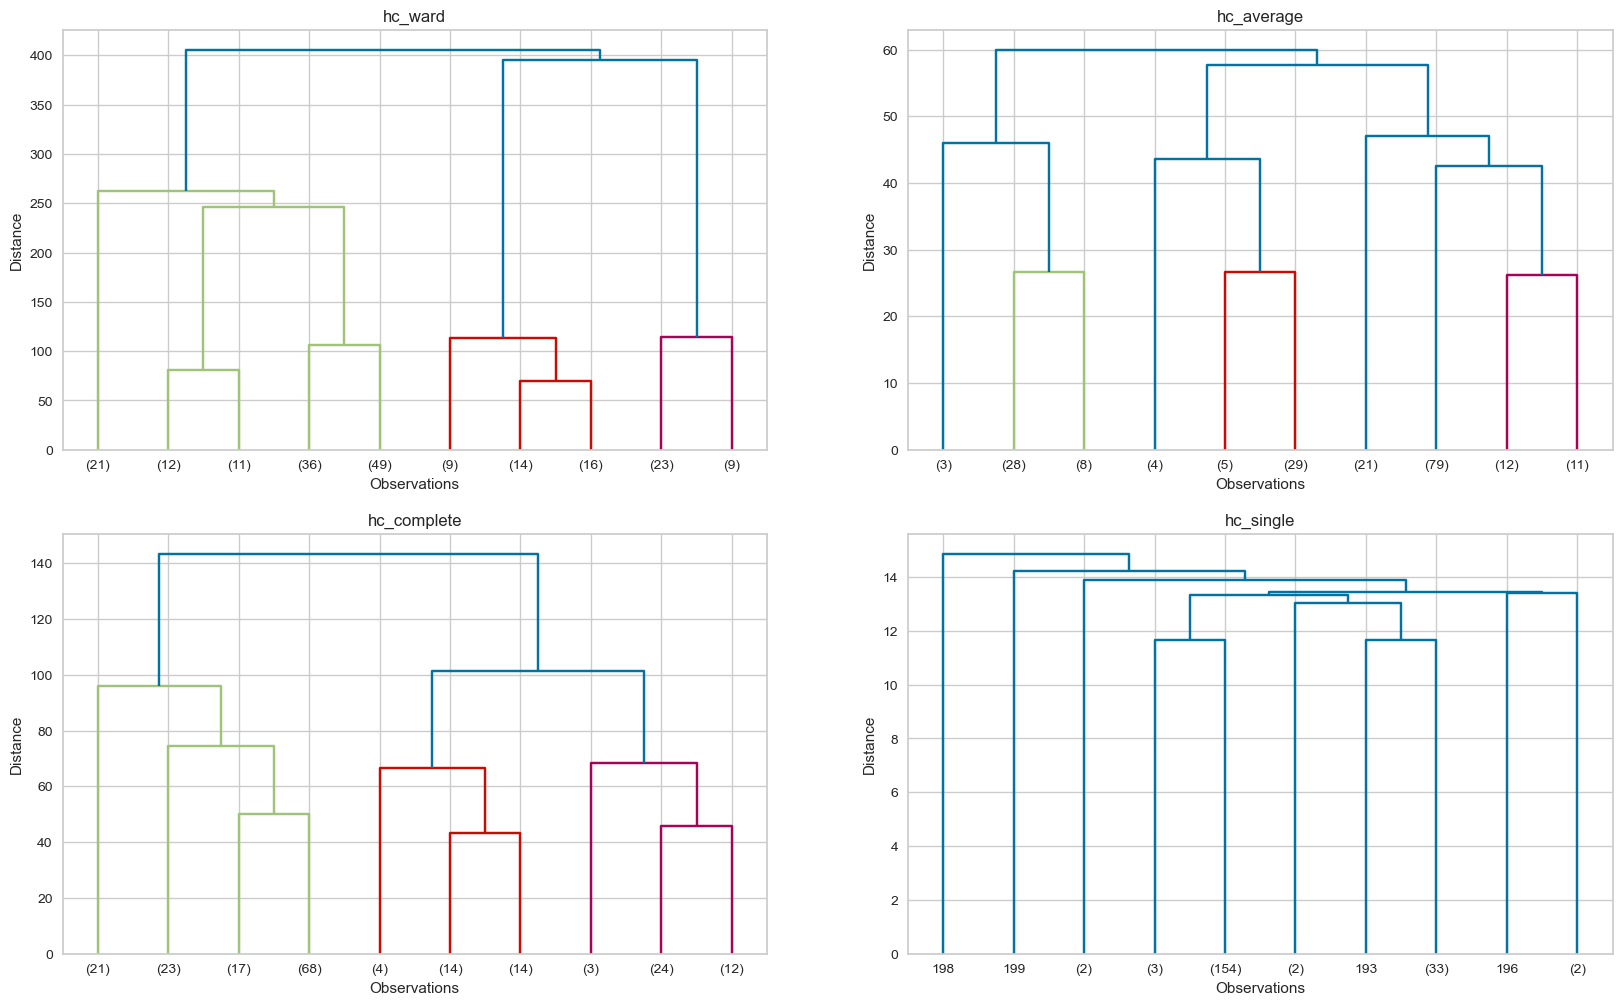

In [48]:
plt.figure(figsize = (20,12))
hc_names = ["hc_ward", "hc_average", "hc_complete", "hc_single"]
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10, truncate_mode='lastp', p=10)
    k +=1

In [49]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f"Num of Clusters : {k}, Score : {round(silhouette_score(X2, model.labels_), 3)}")

Num of Clusters : 2, Score : 0.367
Num of Clusters : 3, Score : 0.462
Num of Clusters : 4, Score : 0.492
Num of Clusters : 5, Score : 0.553
Num of Clusters : 6, Score : 0.538
Num of Clusters : 7, Score : 0.52
Num of Clusters : 8, Score : 0.433
Num of Clusters : 9, Score : 0.439


### 3.2.2 Apply Agglomerative Clustering
[Table of Contents](#0.1)

#### 3.2.2.1 Age and Spending Score- x1

In [50]:
model1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
model1.fit_predict(X1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

#### 3.2.2.2 Annual Income and Spending Score- x2

In [51]:
model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### 3.2.3 Visualizing and Labeling All the Clusters

#### 3.2.3.1 Age and Spending Score- x1

In [52]:
clusters1 = model1.labels_

In [53]:
X1["predicted_clusters"] = clusters1
X1.head(3)

,age,spending_score,predicted_clusters
0,19,39,0
1,21,81,3
2,20,6,2


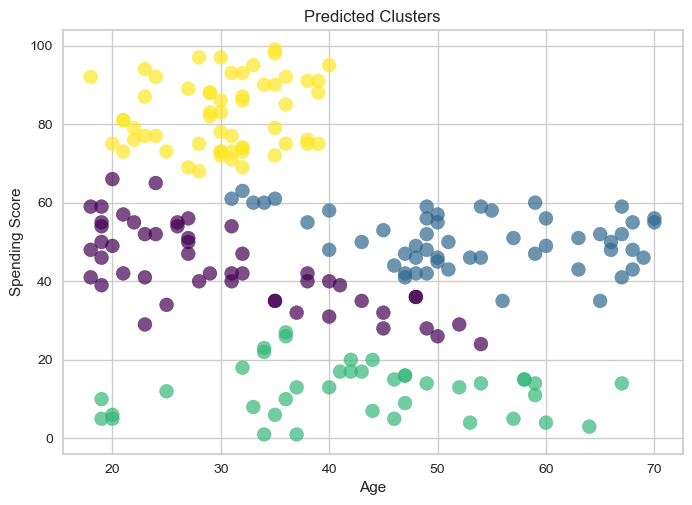

In [54]:
plt.scatter(X1["age"], X1["spending_score"], c = clusters1, cmap = "viridis", alpha=0.7, s=100)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Predicted Clusters");

#### 3.2.3.2 Annual Income and Spending Score- x2

In [55]:
clusters2 = model2.labels_

In [56]:
X2["predicted_clusters"] = clusters2
X2.head(3)

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,3
2,16,6,4


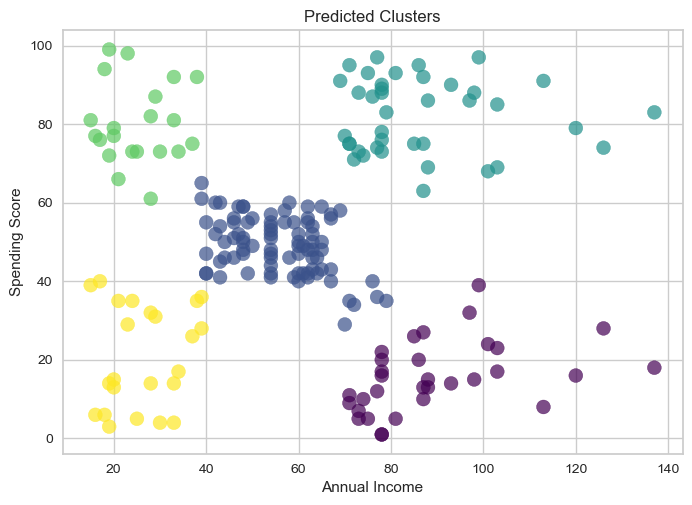

In [57]:
plt.scatter(X2["annual_income"], X2["spending_score"], c = clusters2, cmap = "viridis", alpha=0.7, s=100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Predicted Clusters");

# 4. Conclusion  <a class="anchor" id="17"></a>
[Table of Contents](#0.1)

## 4.1 Interpretation based on Age and Spending Score- x1 <a class="anchor" id="18"></a>
[Table of Contents](#0.1)

In [58]:
pd.concat([df, X1["predicted_clusters"]], axis=1).drop(columns="gender").groupby(["predicted_clusters"]).mean()

,age,annual_income,spending_score
predicted_clusters,,,
0,30.520000,55.760000,43.620000
1,53.169811,54.207547,50.452830
2,42.650000,67.125000,12.275000
3,30.175439,66.070175,82.350877


#### Insights:
**cluster 0**: The average age is around 30, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1** : The average age is around 55, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 2**: The average age is around 40, the annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 3** :The average age is around 30, the annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    


## 4.2 Interpretation based on Annual Income and Spending Score- x2 <a class="anchor" id="19"></a>
[Table of Contents](#0.1)

### 4.2.1 Interpretation For All Genders

In [59]:
pd.concat([df, X2["predicted_clusters"]], axis=1).drop(columns="gender").groupby(["predicted_clusters"]).mean()

,age,annual_income,spending_score
predicted_clusters,,,
0,41.000000,89.406250,15.593750
1,42.482353,55.811765,49.129412
2,32.692308,86.538462,82.128205
3,25.333333,25.095238,80.047619
4,45.217391,26.304348,20.913043


**cluster 0 :** The average age is around 40, their annual income is very high but their spending_score is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 1 :** The average age is around 40, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.

**cluster 2 :** The average age is around 30, both annula_income and spending_scores are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

**cluster 3 :** The average age is around 25. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

**cluster 4 :** The average age is around 45. Both annula_income and spending_scores are low. It can be directed to shopping with gift certificates.

### 4.2.2 Interpretation For Female Gender
[Table of Contents](#0.1)

In [60]:
pd.concat([df, X2["predicted_clusters"]], axis=1).groupby(["gender","predicted_clusters"]).mean()[:5]

age  annual_income  spending_score
gender predicted_clusters                                          
Female 0                   43.785714      93.285714       20.642857
       1                   40.509804      55.784314       48.647059
       2                   32.190476      86.047619       81.666667
       3                   25.583333      24.583333       81.833333
       4                   43.214286      27.357143       21.714286

#### Insights:
**cluster 0**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 1** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 2**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 45. Both annula_income and spending_scores are low. It can be4
directed to shopping with gift certificates.



### 4.2.3 Interpretation For Male Gender
[Table of Contents](#0.1)

In [61]:
pd.concat([df, X2["predicted_clusters"]], axis=1).groupby(["gender","predicted_clusters"]).mean()[5:]

age  annual_income  spending_score
gender predicted_clusters                                          
Male   0                   38.833333      86.388889       11.666667
       1                   45.441176      55.852941       49.852941
       2                   33.277778      87.111111       82.666667
       3                   25.000000      25.777778       77.666667
       4                   48.333333      24.666667       19.666667

#### Insights:
**cluster 0**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 1** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 2**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.